In [445]:
import numpy as np
from scipy import optimize
import  matplotlib.pyplot as plt

x = np.r_[0, 0.25, 1, 1, 0, -0.5]
y = np.r_[0, 0,    0, 1, 1, -0.5]

method_2 = "leastsq"

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

x_m, y_m = np.mean(x), np.mean(y)
center_estimate = x_m, y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

In [446]:
center_2

array([0.34383459, 0.4571819 ])

In [454]:
import numpy as np
import  matplotlib.pyplot as plt

# x = np.r_[0, 0.25, 1, 1, 0, -0.5]
# y = np.r_[0, 0,    0, 1, 1, -0.5]

pointsA = np.array([[0, 0.25, 1, 1, 0, -0.5],
                    [0, 0,    0, 1, 1, -0.5]]).T
def calculateMatrixB(points):
    
    B = []
    for p in points:
        B.append(np.hstack((2 * p.T, -1)))
    return np.array(B)

def calculateVectord(points):
    
    d = []
    for p in points:
        d.append(np.linalg.norm(p) ** 2)
    return np.array(d).T
    

In [455]:
B = calculateMatrixB(pointsA)
d = calculateVectord(pointsA)

In [456]:
BTB = np.dot(B.T, B)
BTB_INV = np.linalg.inv(BTB)
BTB_INV_BT = np.dot(BTB_INV, B.T)
y = np.dot(BTB_INV_BT, d)

In [457]:
y

array([ 0.25431034,  0.31896552, -0.45258621])

In [458]:
BTB_INV

array([[ 0.17241379, -0.07471264,  0.06321839],
       [-0.07471264,  0.16570881,  0.03927203],
       [ 0.06321839,  0.03927203,  0.22318008]])

In [459]:
# center of circle
a, b = y[0], y[1]
# radius of circle
r = np.sqrt(np.sum(y[:-1] ** 2) - y[-1])

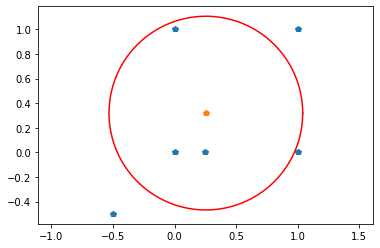

In [460]:
theta = np.arange(0, 2*np.pi, 0.01)
c_x = a + r * np.cos(theta)
c_y = b + r * np.sin(theta)

plt.figure()
plt.plot(pointsA.T[0], pointsA.T[1], 'p')
plt.plot(a, b, 'p')
# draw the solution circle
plt.plot(c_x, c_y, c='red')
plt.axis('equal')

plt.show()

In [390]:
a, b, r

(0.25431034482758635, 0.3189655172413792, 0.7867648693046342)